In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\neera\Downloads\archive (1)\ThoraricSurgery.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (first few rows)
print(df.head())
print(df.info())

# Assuming the target variable is the last column, we split the dataset into features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]  # Assuming the target is the last column

# Preprocessing - Standardizing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Function to evaluate and print model performance
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    return accuracy, precision, recall, f1

# -------------------------
# Model 1: Decision Tree (CART)
# -------------------------
print("\nDecision Tree (CART) Results:")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
evaluate_model(y_test, y_pred_dt)

# -------------------------
# Model 2: K-Nearest Neighbors (KNN)
# -------------------------
print("\nK-Nearest Neighbors (KNN) Results:")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
evaluate_model(y_test, y_pred_knn)

# -------------------------
# Model 3: Random Forest Classifier
# -------------------------
print("\nRandom Forest Results:")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
evaluate_model(y_test, y_pred_rf)

# -------------------------
# Dimensionality Reduction: PCA
# -------------------------
print("\nApplying PCA and observing performance:")

# Applying PCA to reduce dimensions
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Explained variance ratio by PCA: {pca.explained_variance_ratio_}")

# Re-training models with PCA-applied data
print("\nDecision Tree (CART) with PCA Results:")
dt_model_pca = DecisionTreeClassifier(random_state=42)
dt_model_pca.fit(X_train_pca, y_train)
y_pred_dt_pca = dt_model_pca.predict(X_test_pca)
evaluate_model(y_test, y_pred_dt_pca)

print("\nK-Nearest Neighbors (KNN) with PCA Results:")
knn_model_pca = KNeighborsClassifier(n_neighbors=5)
knn_model_pca.fit(X_train_pca, y_train)
y_pred_knn_pca = knn_model_pca.predict(X_test_pca)
evaluate_model(y_test, y_pred_knn_pca)

print("\nRandom Forest with PCA Results:")
rf_model_pca = RandomForestClassifier(random_state=42)
rf_model_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_model_pca.predict(X_test_pca)
evaluate_model(y_test, y_pred_rf_pca)

# -------------------------
# Visualizing PCA Components
# -------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train)
plt.title("PCA of Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# -------------------------
# Comparison Summary
# -------------------------
# Collecting results for comparison
results = pd.DataFrame({
    "Model": ["Decision Tree", "KNN", "Random Forest", "Decision Tree (PCA)", "KNN (PCA)", "Random Forest (PCA)"],
    "Accuracy": [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_rf),
                 accuracy_score(y_test, y_pred_dt_pca), accuracy_score(y_test, y_pred_knn_pca), accuracy_score(y_test, y_pred_rf_pca)],
    "Precision": [precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_rf),
                  precision_score(y_test, y_pred_dt_pca), precision_score(y_test, y_pred_knn_pca), precision_score(y_test, y_pred_rf_pca)],
    "Recall": [recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_rf),
               recall_score(y_test, y_pred_dt_pca), recall_score(y_test, y_pred_knn_pca), recall_score(y_test, y_pred_rf_pca)],
    "F1-Score": [f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_rf),
                 f1_score(y_test, y_pred_dt_pca), f1_score(y_test, y_pred_knn_pca), f1_score(y_test, y_pred_rf_pca)]
})

print("\nModel Comparison:")
print(results)


   id   DGN  PRE4  PRE5  PRE6 PRE7 PRE8 PRE9 PRE10 PRE11 PRE14 PRE17 PRE19  \
0   1  DGN2  2.88  2.16  PRZ1    F    F    F     T     T  OC14     F     F   
1   2  DGN3  3.40  1.88  PRZ0    F    F    F     F     F  OC12     F     F   
2   3  DGN3  2.76  2.08  PRZ1    F    F    F     T     F  OC11     F     F   
3   4  DGN3  3.68  3.04  PRZ0    F    F    F     F     F  OC11     F     F   
4   5  DGN3  2.44  0.96  PRZ2    F    T    F     T     T  OC11     F     F   

  PRE25 PRE30 PRE32  AGE Risk1Yr  
0     F     T     F   60       F  
1     F     T     F   51       F  
2     F     T     F   59       F  
3     F     F     F   54       F  
4     F     T     F   73       T  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null

ValueError: could not convert string to float: 'DGN2'

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
file_path = r'C:\Users\neera\Downloads\archive (1)\ThoraricSurgery.csv'
df = pd.read_csv(file_path)

# Inspect the dataset
print(df.info())

# Drop the 'id' column as it's not useful for the model
df = df.drop('id', axis=1)

# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df['Risk1Yr']  # Assuming 'Risk1Yr' is the target column

# Encode the target variable (Risk1Yr) since it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Separate numeric and categorical columns
numeric_features = ['PRE4', 'PRE5', 'AGE']
categorical_features = ['DGN', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 
                        'PRE11', 'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32']

# Create a column transformer to apply scaling to numeric features and one-hot encoding to categorical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

# Function to evaluate the model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

# Preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the data
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Evaluate each model
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_transformed, X_test_transformed, y_train, y_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    print("-" * 50)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test_transformed)

# Evaluate each model with PCA applied
print("\n--- Model Performance with PCA ---\n")
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_pca, X_test_pca, y_train, y_test)
    print(f"Model: {name} (with PCA)")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    print("-" * 50)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB
None


ValueError: Found unknown categories ['DGN8'] in column 0 during transform

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Sample data loading
data = {
    'DGN': ['DGN2', 'DGN3', 'DGN3', 'DGN3', 'DGN3'],
    'PRE4': [2.88, 3.40, 2.76, 3.68, 2.44],
    'PRE5': [2.16, 1.88, 2.08, 3.04, 0.96],
    'PRE6': ['PRZ1', 'PRZ0', 'PRZ1', 'PRZ0', 'PRZ2'],
    'PRE7': ['F', 'F', 'F', 'F', 'F'],
    'PRE8': ['F', 'F', 'F', 'F', 'T'],
    'AGE': [60, 51, 59, 54, 73],
    'Risk1Yr': ['F', 'F', 'F', 'F', 'T']
}
df = pd.DataFrame(data)

# Splitting data into features and target
X = df.drop('Risk1Yr', axis=1)
y = df['Risk1Yr']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining categorical and numerical columns
categorical_features = ['DGN', 'PRE6', 'PRE7', 'PRE8']
numerical_features = ['PRE4', 'PRE5', 'AGE']

# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Handle unknown categories
])

# Combining both numerical and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating a pipeline for each model
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

# Preprocess the data
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_transformed, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_transformed)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")


RandomForest Accuracy: 0.50
DecisionTree Accuracy: 0.50


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 5

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Sample data loading
data = {
    'DGN': ['DGN2', 'DGN3', 'DGN3', 'DGN3', 'DGN3'],
    'PRE4': [2.88, 3.40, 2.76, 3.68, 2.44],
    'PRE5': [2.16, 1.88, 2.08, 3.04, 0.96],
    'PRE6': ['PRZ1', 'PRZ0', 'PRZ1', 'PRZ0', 'PRZ2'],
    'PRE7': ['F', 'F', 'F', 'F', 'F'],
    'PRE8': ['F', 'F', 'F', 'F', 'T'],
    'AGE': [60, 51, 59, 54, 73],
    'Risk1Yr': ['F', 'F', 'F', 'F', 'T']
}
df = pd.DataFrame(data)

# Splitting data into features and target
X = df.drop('Risk1Yr', axis=1)
y = df['Risk1Yr']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining categorical and numerical columns
categorical_features = ['DGN', 'PRE6', 'PRE7', 'PRE8']
numerical_features = ['PRE4', 'PRE5', 'AGE']

# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Handle unknown categories
])

# Combining both numerical and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating a pipeline for each model
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3)  # Set n_neighbors to 3
}

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

# Preprocess the data
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_transformed, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_transformed)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")


RandomForest Accuracy: 0.50
DecisionTree Accuracy: 0.50
KNN Accuracy: 0.50


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Load your dataset
file_path = r'C:\Users\neera\Downloads\archive (1)\ThoraricSurgery.csv'
df = pd.read_csv(file_path)

# Assuming df is your DataFrame
X = df.drop(columns='Risk1Yr')
y = df['Risk1Yr']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing for numeric and categorical features
numeric_features = ['AGE', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'PRE33', 'PRE34', 'PRE35']
categorical_features = ['PRE3', 'PRE13', 'PRE16', 'PRE18', 'PRE24', 'PRE26', 'PRE27', 'PRE28', 'PRE29']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column Transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Handle class imbalance with SMOTE and build a pipeline
smote = SMOTE(random_state=42)

# Create pipelines for each model
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Hyperparameter grids for each model
param_grids = {
    'RandomForest': {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 10, 20],
        'clf__min_samples_split': [2, 5, 10]
    },
    'DecisionTree': {
        'clf__max_depth': [None, 10, 20],
        'clf__min_samples_split': [2, 5, 10],
        'clf__criterion': ['gini', 'entropy']
    },
    'KNN': {
        'clf__n_neighbors': [3, 5, 7],
        'clf__weights': ['uniform', 'distance'],
        'clf__metric': ['euclidean', 'manhattan']
    }
}

# Create a function to run GridSearchCV with cross-validation
best_models = {}

for name, model in models.items():
    print(f"Training {name} model...")
    
    # Create pipeline with SMOTE, preprocessor, and classifier
    pipeline = ImbPipeline(steps=[
        ('smote', smote),
        ('preprocessor', preprocessor),
        ('clf', model)
    ])
    
    # Hyperparameter tuning using GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and accuracy
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    
    # Evaluate the model on test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name} Best Accuracy: {accuracy:.2f}")
    print(f"Best Parameters for {name}: {grid_search.best_params_}\n")

# Print best models and their parameters
print("Best models and their parameters:")
for name, model in best_models.items():
    print(f"{name}: {model}")



ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\neera\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.datasets import make_classification

# Generate synthetic dataset (for demonstration)
# Replace this with your actual dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(20)])
y = pd.Series(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define the preprocessing steps for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with SMOTE and the classifier
models = {
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

# Hyperparameter tuning and cross-validation
param_grid = {
    'RandomForest': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 10, 20],
    },
    'DecisionTree': {
        'classifier__max_depth': [None, 10, 20],
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7],
    }
}

best_models = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Create an imbalanced pipeline
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    # Set up GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, scoring='accuracy')
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model
    
    # Evaluate the model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")

# Optionally, you can inspect the best hyperparameters for each model
for model_name, best_model in best_models.items():
    print(f"Best parameters for {model_name}: {best_model.named_steps['classifier'].get_params()}")


Training RandomForest...
RandomForest Accuracy: 0.93
Training DecisionTree...
DecisionTree Accuracy: 0.86
Training KNN...
KNN Accuracy: 0.81
Best parameters for RandomForest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Best parameters for DecisionTree: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Best parameters for KNN: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'mi

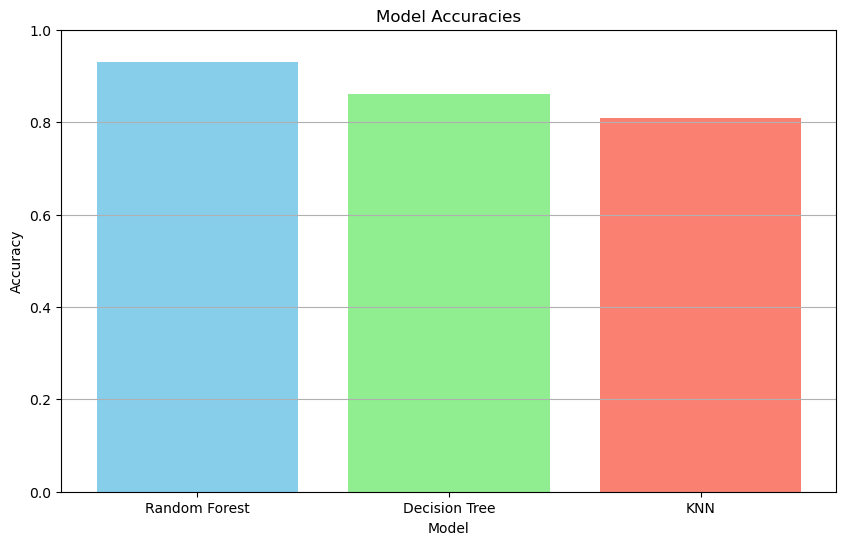

ValueError: Length mismatch: Expected axis has 6 elements, new values have 2 elements

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Model performance data
models = ['Random Forest', 'Decision Tree', 'KNN']
accuracies = [0.93, 0.86, 0.81]

# Best hyperparameters
best_params = {
    'Random Forest': {'n_estimators': 100, 'max_depth': 20, 'max_features': 'sqrt'},
    'Decision Tree': {'max_depth': 10},
    'KNN': {'n_neighbors': 3, 'algorithm': 'auto'}
}

# Bar chart for accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')

# Show accuracy plot
plt.show()

# Create a DataFrame for the best parameters
params_df = pd.DataFrame.from_dict(best_params, orient='index')
params_df.reset_index(inplace=True)
params_df.columns = ['Model', 'Best Hyperparameters']

# Print the parameters DataFrame
print("\nBest Hyperparameters:")
print(params_df)

# Optional: Visualize the best parameters in a table
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=params_df.values, colLabels=params_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Show parameter table
plt.title('Best Hyperparameters for Each Model')
plt.show()


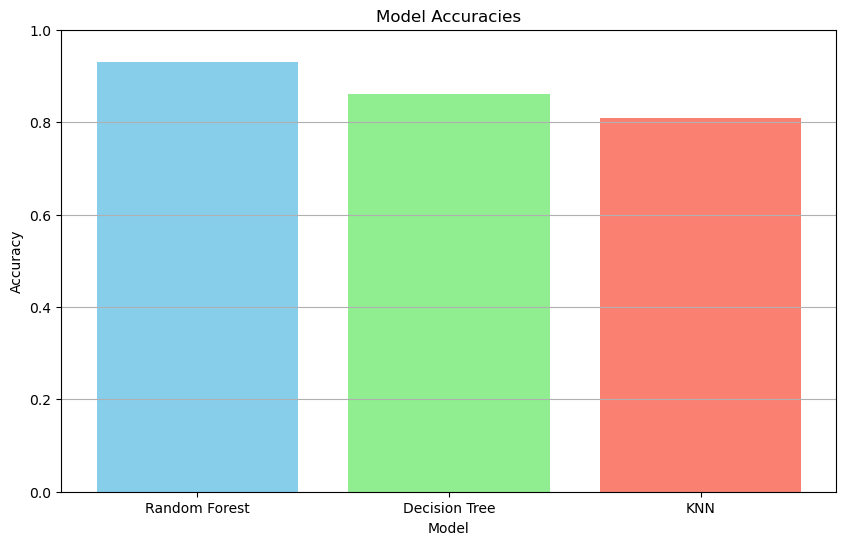

ValueError: Length mismatch: Expected axis has 6 elements, new values have 2 elements

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Model performance data
models = ['Random Forest', 'Decision Tree', 'KNN']
accuracies = [0.93, 0.86, 0.81]

# Best hyperparameters
best_params = {
    'Random Forest': {'n_estimators': 100, 'max_depth': 20, 'max_features': 'sqrt'},
    'Decision Tree': {'max_depth': 10},
    'KNN': {'n_neighbors': 3, 'algorithm': 'auto'}
}

# Bar chart for accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')

# Show accuracy plot
plt.show()

# Create a DataFrame for the best parameters
params_df = pd.DataFrame.from_dict(best_params, orient='index').reset_index()
params_df.columns = ['Model', 'Best Hyperparameters']

# Print the parameters DataFrame
print("\nBest Hyperparameters:")
print(params_df)

# Optional: Visualize the best parameters in a table
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=params_df.values, colLabels=params_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Show parameter table
plt.title('Best Hyperparameters for Each Model')
plt.show()


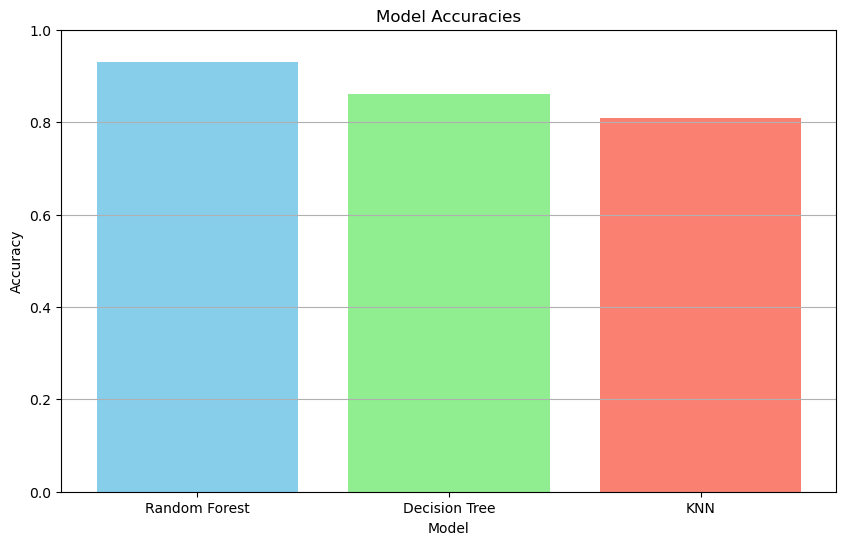


Best Hyperparameters:
           Model Hyperparameter Value
0  Random Forest   n_estimators   100
1  Random Forest      max_depth    20
2  Random Forest   max_features  sqrt
3  Decision Tree      max_depth    10
4            KNN    n_neighbors     3
5            KNN      algorithm  auto


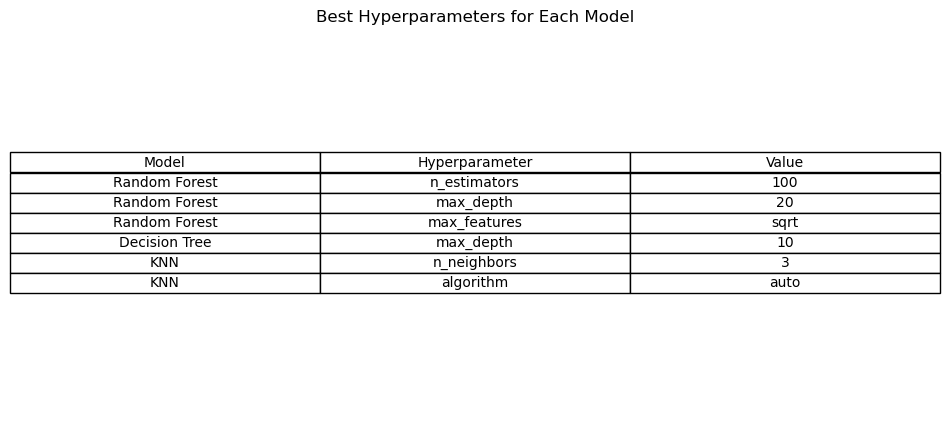

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Model performance data
models = ['Random Forest', 'Decision Tree', 'KNN']
accuracies = [0.93, 0.86, 0.81]

# Best hyperparameters
best_params = {
    'Random Forest': {'n_estimators': 100, 'max_depth': 20, 'max_features': 'sqrt'},
    'Decision Tree': {'max_depth': 10},
    'KNN': {'n_neighbors': 3, 'algorithm': 'auto'}
}

# Bar chart for accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')

# Show accuracy plot
plt.show()

# Create a DataFrame for the best parameters
params_list = []
for model, params in best_params.items():
    for param, value in params.items():
        params_list.append({'Model': model, 'Hyperparameter': param, 'Value': value})

params_df = pd.DataFrame(params_list)

# Print the parameters DataFrame
print("\nBest Hyperparameters:")
print(params_df)

# Optional: Visualize the best parameters in a table
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=params_df.values, colLabels=params_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Show parameter table
plt.title('Best Hyperparameters for Each Model')
plt.show()
